In [6]:
!conda create -n vgg16_env python=3.10 -y

Jupyter detected...
2 channel Terms of Service accepted
doneieving notices: - 
Channels:
 - defaults
Platform: osx-arm64
doneng package metadata (repodata.json): 
doneing environment: - 

## Package Plan ##

  environment location: /opt/anaconda3/envs/vgg16_env

  added / updated specs:
    - python=3.10


The following NEW packages will be INSTALLED:

  bzip2              pkgs/main/osx-arm64::bzip2-1.0.8-h80987f9_6 
  ca-certificates    pkgs/main/osx-arm64::ca-certificates-2025.12.2-hca03da5_0 
  expat              pkgs/main/osx-arm64::expat-2.7.3-h50f4ffc_4 
  libcxx             pkgs/main/osx-arm64::libcxx-20.1.8-hd7fd590_1 
  libexpat           pkgs/main/osx-arm64::libexpat-2.7.3-h50f4ffc_4 
  libffi             pkgs/main/osx-arm64::libffi-3.4.4-hca03da5_1 
  libzlib            pkgs/main/osx-arm64::libzlib-1.3.1-h5f15de7_0 
  ncurses            pkgs/main/osx-arm64::ncurses-6.5-hee39554_0 
  openssl            pkgs/main/osx-arm64::openssl-3.0.18-h9b4081a_0 
  pip                pkgs/

In [7]:
!pip install torch torchvision pillow matplotlib ipykernel

In [8]:
!python -m ipykernel install --user --name tf310 --display-name "Python (tf310)"

Installed kernelspec tf310 in /Users/macbook/Library/Jupyter/kernels/tf310


In [1]:
import torch
from torchvision import models, transforms
from PIL import Image
import matplotlib.pyplot as plt

In [2]:
model = models.vgg16(pretrained=True)
model.eval()

/opt/anaconda3/lib/python3.13/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/anaconda3/lib/python3.13/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /Users/macbook/.cache/torch/hub/checkpoints/vgg16-397923af.pth


100%|████████████████████████████████████████| 528M/528M [02:03<00:00, 4.47MB/s]


VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [9]:
preprocess = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(
        mean=[0.485, 0.456, 0.406],
        std=[0.229, 0.224, 0.225]
    )
])

In [10]:
img = Image.open("cat_image.jpg").convert("RGB")


In [11]:
input_tensor = preprocess(img).unsqueeze(0)


In [12]:
with torch.no_grad():
    output = model(input_tensor)
    pred_class = output.argmax(1).item()

pred_class

282

In [13]:
from torchvision.models import VGG16_Weights

labels = VGG16_Weights.DEFAULT.meta["categories"]
label = labels[pred_class]
label

'tiger cat'

(np.float64(-0.5), np.float64(599.5), np.float64(399.5), np.float64(-0.5))

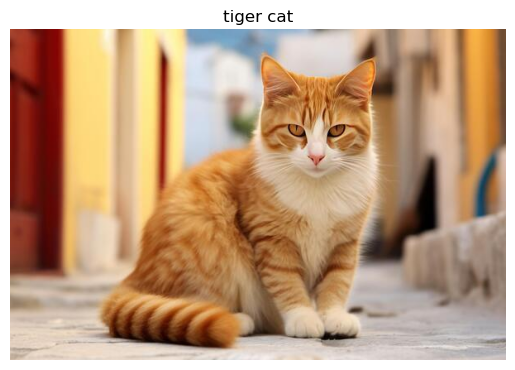

In [14]:
plt.imshow(img)
plt.title(label)
plt.axis("off")